In [1]:
training_records = []
running_score_records = []
running_score = 0

c1_running_score = 0
c1_training_records = []
c1_running_score_records = []

c2_running_score = 0
c2_training_records = []
c2_running_score_records = []

with open('result.txt') as f:
    for line in f.readlines():
        if line[0] == 'E':
            pass
        
            





In [2]:
import re

# define regular expressions to extract the required values
last_score_re = re.compile(r'Last score: ([-\d.]+)')
moving_avg_score_re = re.compile(r'Moving average score: ([-\d.]+)')
c1_score_re = re.compile(r'c1 score: ([-\d.]+)')
c1_moving_avg_re = re.compile(r'c1 Moving average: ([-\d.]+)')
c2_score_re = re.compile(r'c2 score: ([-\d.]+)')
c2_moving_avg_re = re.compile(r'c2 Moving average: ([-\d.]+)')

# define arrays to store the extracted values
last_scores = []
moving_avg_scores = []
c1_scores = []
c1_moving_avg_scores = []
c2_scores = []
c2_moving_avg_scores = []

# read the log file line by line
with open('result.txt', 'r') as f:
    for line in f:
        # match each regular expression to the current line
        last_score_match = last_score_re.search(line)
        moving_avg_score_match = moving_avg_score_re.search(line)
        c1_score_match = c1_score_re.search(line)
        c1_moving_avg_match = c1_moving_avg_re.search(line)
        c2_score_match = c2_score_re.search(line)
        c2_moving_avg_match = c2_moving_avg_re.search(line)
        
        # if a match is found, extract the value and store it in the corresponding array
        if last_score_match:
            last_scores.append(float(last_score_match.group(1)))
        if moving_avg_score_match:
            moving_avg_scores.append(float(moving_avg_score_match.group(1)))
        if c1_score_match:
            c1_scores.append(float(c1_score_match.group(1)))
        if c1_moving_avg_match:
            c1_moving_avg_scores.append(float(c1_moving_avg_match.group(1)))
        if c2_score_match:
            c2_scores.append(float(c2_score_match.group(1)))
        if c2_moving_avg_match:
            c2_moving_avg_scores.append(float(c2_moving_avg_match.group(1)))

# print the extracted values
print('Last scores:', last_scores)
print('Moving average scores:', moving_avg_scores)
print('c1 scores:', c1_scores)
print('c1 moving average scores:', c1_moving_avg_scores)
print('c2 scores:', c2_scores)
print('c2 moving average scores:', c2_moving_avg_scores)


Last scores: [-17.93, -18.1, -17.97, -22.57, -17.95, -17.98, 3.38, -17.95, 0.12, -2.19, 8.29, 9.56, 14.36, 12.28, -12.03, 0.17, -17.95, -9.03, 4.11, 8.8, -18.02, 14.5, -2.44, 1.75, 11.78, 15.94, 0.22, 16.27, 8.39, 5.68, 8.01, 19.76, 9.62, 25.53, 11.74, 17.95, 37.37, 8.55, 11.06, 20.62, 24.55, 30.23, 26.9, 21.07, 32.42, 36.13, 32.05, 10.54, 37.07, 13.5, -17.95, 27.72, 34.61, 10.38, 33.91, 50.6, 10.77, 13.23, 18.04, 17.37, 37.53, 13.36, 42.76, 56.08, 39.74, 52.78, 35.34, 13.47, 34.06, 8.79, 19.32, 56.09, 56.09, 25.66, 54.4, 249.95, 30.79, 56.3, 89.02, 32.26, 56.1, 76.02, 184.29, 348.98, 196.46, 332.15, 13.74, 56.03, 509.27, 836.33, 261.71, 206.66, 17.69, 567.16, 580.23, 123.6, 29.09, 867.77, 832.42, 827.14, 643.97, 140.34, 872.96, 857.99, 252.34, 857.28, 842.49, 859.61, 809.8, 864.5, 1001.3, 291.9, 988.4, 313.4, 818.83, 502.81, 885.35, 484.71, 835.75, 584.15, 551.8, 270.05, 421.02, 546.76, 888.86, 849.63, 854.64, 857.59, 876.74, 827.82, 860.55, 388.62, 1009.9, 883.86, 875.24, 830.59, 883

In [3]:
import matplotlib.pyplot as plt

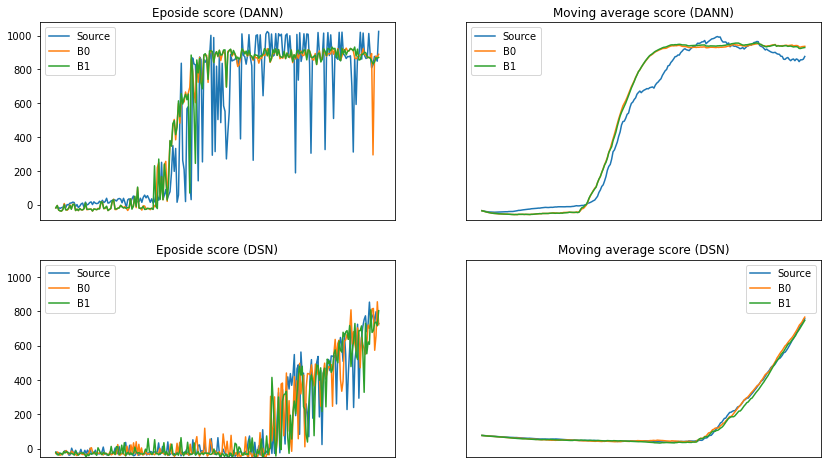

In [51]:
fig, axs  = plt.subplots(2, 2, figsize=(14, 8))

axs[0][0].plot(range(0, 230), last_scores[:230])
axs[0][0].plot(range(0, 230), c1_scores[:230])
axs[0][0].plot(range(0, 230), c2_scores[:230])
axs[0][0].legend(['Source', 'B0', 'B1'])
axs[0][0].title.set_text('Eposide score (DANN)')
axs[0][0].set_xticks([])
axs[0][1].plot(range(0, 230), moving_avg_scores[:230])
axs[0][1].plot(range(0, 230), c1_moving_avg_scores[:230])
axs[0][1].plot(range(0, 230), c2_moving_avg_scores[:230])
axs[0][1].legend(['Source', 'B0', 'B1'])
axs[0][1].title.set_text('Moving average score (DANN)')
axs[0][1].set_xticks([])
axs[0][1].set_yticks([])
axs[0][1].set_ylim([-50, 1000])

counter = 0
last_scores_2 = []

c1_scores_2 = []
c2_scores_2 = []
running_score = 0
c1_running_score = 0
c2_running_score = 0
running_score_records = []
c1_running_score_records = []
c2_running_score_records = []

with open('result2.txt', 'r') as f:
    for line in f:
        if line[0] == 'r' or line[0] == '[' or line[0] == 'D':
            continue
        else:
            score = float(line)
            if (counter % 5 == 0):
                if (counter % 3 == 0):
                    last_scores_2.append(score)
                    running_score = running_score * 0.99 + score * 0.01
                    running_score_records.append(running_score)
                elif (counter % 3 == 1):
                    c1_scores_2.append(score)
                    c1_running_score = c1_running_score * 0.99 + score * 0.01
                    c1_running_score_records.append(c1_running_score)
                else:
                    c2_scores_2.append(score)
                    c2_running_score = c2_running_score * 0.99 + score * 0.01
                    c2_running_score_records.append(c2_running_score)
        counter += 1


axs[1][0].plot(range(0, 246), last_scores_2[:246])
axs[1][0].plot(range(0, 246), c1_scores_2[:246])
axs[1][0].plot(range(0, 246), c2_scores_2[:246])
axs[1][0].legend(['Source', 'B0', 'B1'])
axs[1][0].title.set_text('Eposide score (DSN)')
axs[1][0].set_xticks([])
axs[1][0].set_ylim([-50, 1100])

axs[1][1].plot(range(0, 246), running_score_records[:246])
axs[1][1].plot(range(0, 246), c1_running_score_records[:246])
axs[1][1].plot(range(0, 246), c2_running_score_records[:246])
axs[1][1].legend(['Source', 'B0', 'B1'])
axs[1][1].title.set_text('Moving average score (DSN)')
axs[1][1].set_xticks([])
axs[1][1].set_yticks([])
axs[1][1].set_ylim([-50, 400])
plt.show()

In [35]:
counter = 0
last_scores_2 = []

c1_scores_2 = []
c2_scores_2 = []
running_score = 0
c1_running_score = 0
c2_running_score = 0
running_score_records = []
c1_running_score_records = []
c2_running_score_records = []

with open('result2.txt', 'r') as f:
    for line in f:
        if line[0] == 'r' or line[0] == '[' or line[0] == 'D':
            continue
        else:
            score = float(line)
            if (counter % 5 == 0):
                if (counter % 3 == 0):
                    last_scores_2.append(score)
                    running_score = running_score * 0.99 + score * 0.01
                    running_score_records.append(running_score)
                elif (counter % 3 == 1):
                    c1_scores_2.append(score)
                    c1_running_score = c1_running_score * 0.99 + score * 0.01
                    c1_running_score_records.append(c1_running_score)
                else:
                    c2_scores_2.append(score)
                    c2_running_score = c2_running_score * 0.99 + score * 0.01
                    c2_running_score_records.append(c2_running_score)
        counter += 1

In [36]:
print('Last scores:', len(last_scores_2))
print('c1 scores:', len(c1_scores_2))
print('c2 scores:', len(c2_scores_2))
print('Last scores:', len(last_scores_2))
print('c1 scores:', len(c1_scores_2))
print('c2 scores:', len(c2_scores_2))

Last scores: 247
c1 scores: 246
c2 scores: 246


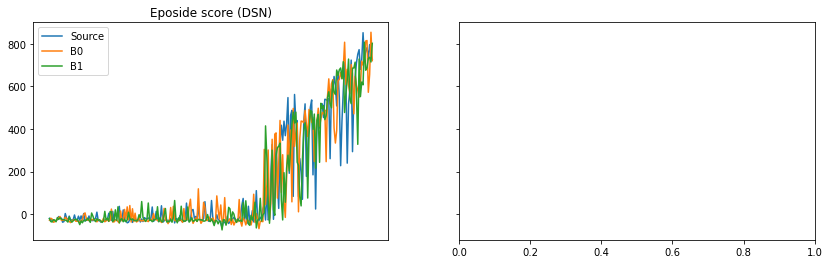

In [37]:
fig, (ax1, ax2)  = plt.subplots(1, 2, sharey=True, figsize=(14, 4))

ax1.plot(range(0, 246), last_scores_2[:246])
ax1.plot(range(0, 246), c1_scores_2[:246])
ax1.plot(range(0, 246), c2_scores_2)
ax1.legend(['Source', 'B0', 'B1'])
ax1.title.set_text('Eposide score (DSN)')
ax1.set_xticks([])

plt.show()